## Problem Statement: Model to predict customer churn for a bank using an Artificial Neural Network, thereby identifying high-risk customers who can be targeted with retention strategies.

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Churn_Modelling 2.csv')
print(data.shape)
data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# EDA


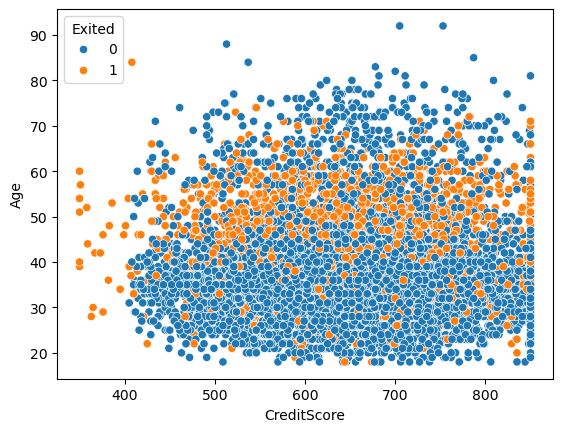

In [8]:
sns.scatterplot(x='CreditScore', y='Age', hue='Exited',data=data)

plt.show()

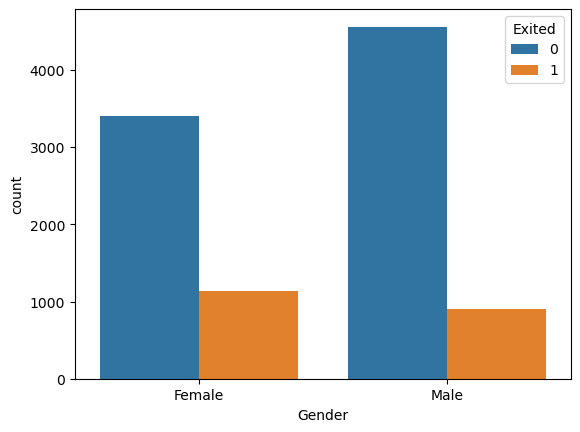

In [9]:
sns.countplot(x='Gender', hue='Exited', data=data)
plt.show()

From this we understand that males stay with bank more than female

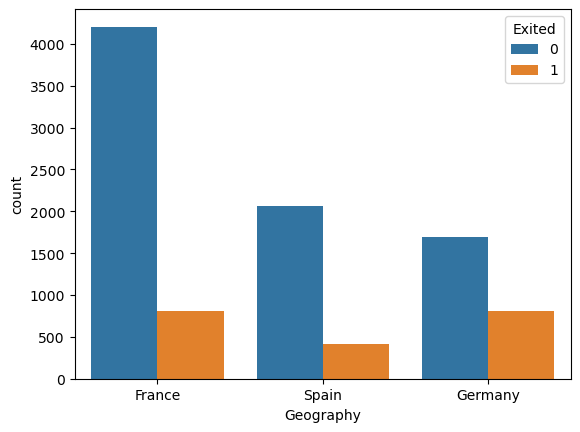

In [10]:
sns.countplot(x='Geography', hue='Exited', data=data)
plt.show()

France has the highest number of customers overall. Consequently, the largest absolute number of retained customers (blue bars) is in France.

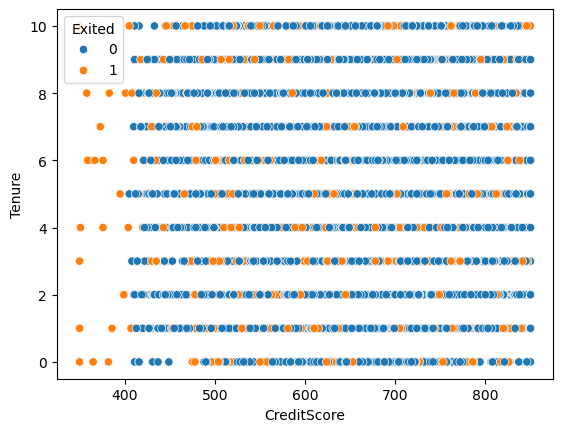

In [11]:
sns.scatterplot(x='CreditScore',y='Tenure',data=data, hue='Exited')
plt.show()


In [12]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


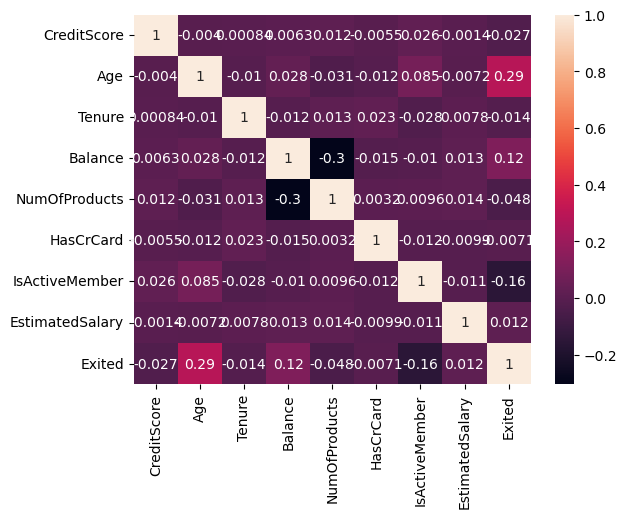

In [14]:
sns.heatmap(data.drop([ "RowNumber", "CustomerId", "Surname", "Geography", "Gender"],axis=1).corr(),annot=True)
plt.show()

Insights from Heatmap

AGE: This is strongest corelation. So oldeer customers are more likely to churn.
BALANCE: the value is +0.12. This tells customers with higher balance have slightly more chance to churn
IsActiveMember: This has largest negative corelation. This tells that inactive members are more likely to churn.
Tenure: The number of years a customer has been with the bank has almost no simple linear correlation with churn
CreditScore: There is essentially no meaningful linear relationship between a customer's credit score and the likelihood of them leaving the bank.

### DATA CLEANING

In [15]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### FEATURE ENGINEERING & SCALLING

Applying One Hot Encoder

In [19]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Why drop_first=True?
# This is done to prevent the 'Dummy Variable Trap,' which is a case of perfect multicollinearity.
# When N categories create N columns, one column is completely redundant (e.g., if Gender_Male=0, 
# we KNOW the customer is Female). Dropping the first redundant column (drop_first=True) 
# ensures the model is stable and accurate by using N-1 columns for N categories.

In [20]:
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True, dtype=int)

In [21]:
data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### SCALING

In [22]:
X=data_encoded.drop(['Exited'],axis=1)

y = data_encoded["Exited"]

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [24]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.2,random_state=10)

In [26]:
from sklearn.preprocessing import StandardScaler

# 1. Define columns to scale (continuous numerical only)
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# 2. Initialize the scaler
scaler = StandardScaler()

# 3. Fit and Transform ONLY the training set's numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# 4. Transform the test set's numerical columns (using the fitted training scale)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
As the output is imbalanced we have to balance data.

In [27]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [29]:
 X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)


In [30]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 6385, 1: 1615})
After SMOTE : Counter({0: 6385, 1: 6385})


### MODEL CREATION

In [31]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(18,9),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train_smote,y_train_smote) ## training the data
y_predict_proba = model.predict_proba(X_test) ## predicting the probability of class
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train_smote)

In [32]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train_smote,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.8251370399373532
Test accuracy : 0.77


In [33]:
## getting the confusion matrix
pd.crosstab(y_test,y_predict) #reduce FN so reccall increase

col_0,0,1
Exited,,
0,1234,344
1,116,306


In [34]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1578
           1       0.47      0.73      0.57       422

    accuracy                           0.77      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.77      0.79      2000



In [ ]:
#This high Recall value means the model can correctly identify over 73% of all customers who are truly going to churn.
#This capability, compared to the 42%. Recall of the unadjusted model, makes the SMOTE-enhanced ANN
#a highly valuable tool for targeted retention campaigns, effectively protecting the bank's revenue.

## FINAL CONCLUSION

The objective of this project was to develop a classification model to predict customer churn (Exited=1).
After exploring key risk indicators (Geography, Gender, Age, and Active Status), the data was scaled and fed into an Artificial Neural Network (ANN).
Due to the imbalanced nature of the data (only 20% churn), the final ANN was trained using the SMOTE oversampling technique. 
This process required accepting a trade-off: the model's overall accuracy decreased from 85% to 77%.We determined the SMOTE model was superior because it directly optimized the business goal: minimizing customer loss (False Negatives). By prioritizing Recall for the minority class (Churned=1), the model achieved the following critical performance metric.

This high Recall value means the model can correctly identify over 73% of all customers who are truly going to churn. This capability, compared to the 42%. Recall of the unadjusted model, makes the SMOTE-enhanced ANN a highly valuable tool for targeted retention campaigns, effectively protecting the bank's revenue.